In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [3]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [4]:
data = w.wsd('IF00.CFE,IF01.CFE,000300.SH', 'close', '2010-05-01', '2020-4-20')

In [5]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [6]:
df.head()

,IF00.CFE,IF01.CFE,000300.SH
2010-05-04,3076.4,3116.8,3019.449
2010-05-05,3076.4,3115.0,3036.394
2010-05-06,2967.4,3018.8,2896.856
2010-05-07,2897.6,2943.0,2836.789
2010-05-10,2918.0,2961.6,2858.233


In [7]:
df['spread'] = df['IF01.CFE'] - df['IF00.CFE']

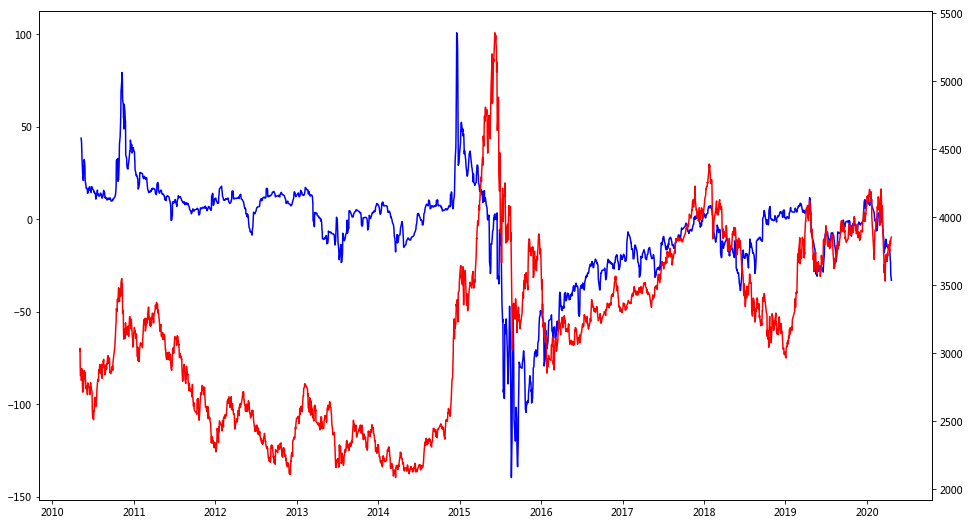

In [11]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(df['spread'].rolling(5).mean(), color='blue')
axx = ax.twinx()
axx.plot(df['000300.SH'], color='red')

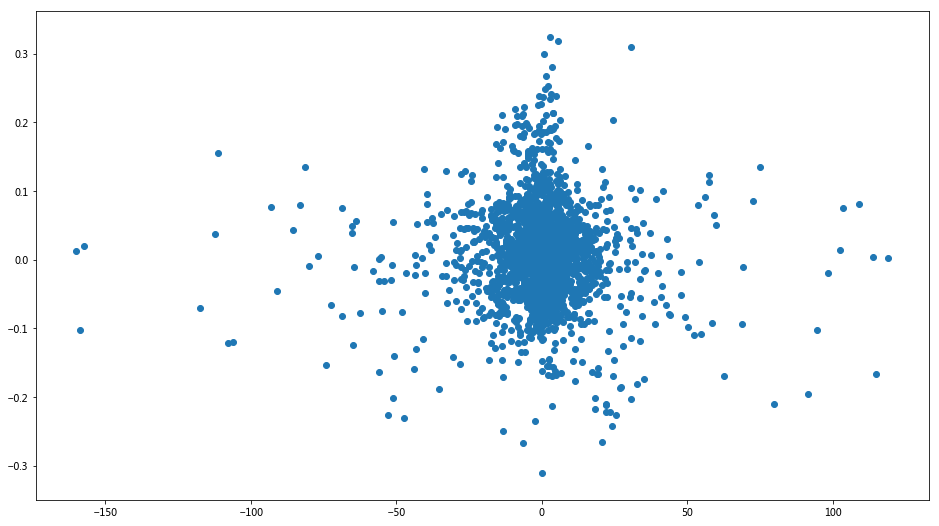

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))

K = 20
ax.scatter(df['spread'].diff(K), df['000300.SH'].pct_change(K).shift(-K))